In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

#### Conexión a base de datos

In [ ]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

### Consultas a base de datos

In [ ]:
start_date = '2024-12-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [ ]:
sql_transactions = f'''

SELECT 
    bikeAccountNumber,
    initializationDateTime,
    processingDateTime,
    completionDateTime,
    merchantTxId,
    amount,
    authorizationNumber,
    paymentType_id,
    paymentBusinessContext_id,
    paymentMode_id,
    paymentResult_id,
    paymentResultReason_id,
    paymentSourceType_id,
    bikeAccountType_id,
    creditCardType_id,
    creditCardId,
    cardBin,
    cardBinBrand,
    cardBinCountry,
    cardBinSubType,
    cardBinType,
    cardBinResult_id,
    reasonCode
FROM BikePaymentFact
WHERE 
	creationDateTime BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_transactions = pd.read_sql(sql_transactions, engine)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238.0,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914.0,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [ ]:
sql_PaymentTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentTypeDim

'''

df_sql_PaymentTypeDim = pd.read_sql(sql_PaymentTypeDim, engine)

df_sql_PaymentTypeDim.head()

,id,localizedValue0
0,0,Purchase
1,1,Pre-authorization
2,2,Completion
3,3,Refund
4,4,Refund (ind.)


In [ ]:
sql_PaymentBusinessContextDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentBusinessContextDim

'''

df_sql_PaymentBusinessContextDim = pd.read_sql(sql_PaymentBusinessContextDim, engine)
df_sql_PaymentBusinessContextDim.head()

,id,localizedValue0
0,0,-
1,2000,Bike
2,2001,Migrated Payments
3,2002,Bike // Credit card validation
4,2003,Bike // Processing credit card validation pre-...


In [ ]:
sql_PaymentModeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentModeDim

'''

df_sql_PaymentModeDim = pd.read_sql(sql_PaymentModeDim, engine)
df_sql_PaymentModeDim.head()

,id,localizedValue0
0,4798412,External
1,5646456,Cash
2,6565426,Electronic
3,6565653,Credit card
4,8308550,Mobile


In [ ]:
sql_PaymentResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultDim

'''

df_sql_PaymentResultDim = pd.read_sql(sql_PaymentResultDim, engine)
df_sql_PaymentResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Accepted
2,2,Refused
3,3,Incomplete
4,4,Cancelled


In [ ]:
sql_PaymentResultReasonDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultReasonDim

'''

df_sql_PaymentResultReasonDim = pd.read_sql(sql_PaymentResultReasonDim, engine)
df_sql_PaymentResultReasonDim.head()

,id,localizedValue0
0,23423,See response code
1,75445,Credit card expired
2,88923,View error code
3,104583,AVS mismatch
4,159489,Credit card deleted error


In [ ]:
sql_PaymentSourceTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentSourceTypeDim

'''

df_sql_PaymentSourceTypeDim = pd.read_sql(sql_PaymentSourceTypeDim, engine)
df_sql_PaymentSourceTypeDim.head()

,id,localizedValue0
0,1,Backend payment source
1,2,Console payment source
2,3,PED
3,10,Test payment source
4,30,Bike web service payment source


In [ ]:
sql_BikeAccountTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM BikeAccountTypeDim

'''

df_sql_BikeAccountTypeDim = pd.read_sql(sql_BikeAccountTypeDim, engine)
df_sql_BikeAccountTypeDim.head()

,id,localizedValue0
0,-128,Unknown
1,1,Member
2,2,Casual


In [ ]:
sql_CreditCardTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_CreditCardTypeDim = pd.read_sql(sql_CreditCardTypeDim, engine)
df_sql_CreditCardTypeDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


In [ ]:
sql_PaymentCreditCardBinResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_PaymentCreditCardBinResultDim = pd.read_sql(sql_PaymentCreditCardBinResultDim, engine)
df_sql_PaymentCreditCardBinResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


### Transformaciones

In [ ]:
# convertir cardBin a entero sin decimales
df_sql_transactions['cardBin'] = pd.to_numeric(df_sql_transactions['cardBin'], errors='coerce').fillna(0).astype(int)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [ ]:
# importar CSV
csv_file_path = '../data/Bin_ECOBICI.csv'
df_bines = pd.read_csv(csv_file_path, encoding='utf-8')
df_bines.head(1)

,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,202022,6,COMPLETO,110030,BAJIO,PRESTAMOS ABCD,ABCD,CRÃDITO,PRIVADA


In [ ]:
# Agregar datos de df_bines a df_sql_transactions
df_merged = pd.merge(df_sql_transactions, df_bines, how='left', left_on='cardBin', right_on='BIN')
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


In [ ]:
# Formatos de fecha
df_merged['initializationDateTime'] = pd.to_datetime(df_merged['initializationDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['processingDateTime'] = pd.to_datetime(df_merged['processingDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['completionDateTime'] = pd.to_datetime(df_merged['completionDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged.head(1)


,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


#### PaymentTypeDim
Contains information pertaining to the type of transaction.

In [ ]:
df_merged['tipo_pago'] = df_merged.merge(df_sql_PaymentTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal


#### PaymentBusinessContextDim
Contains information pertaining to the business context of the payment.

In [ ]:
df_merged['contexto_negocio_pago'] = df_merged.merge(df_sql_PaymentBusinessContextDim[['id', 'localizedValue0']], how='left', left_on='paymentBusinessContext_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...


#### PaymentModeDim
Contains information pertaining to the payment means

In [ ]:
df_merged['modo_pago'] = df_merged.merge(df_sql_PaymentModeDim[['id', 'localizedValue0']], how='left', left_on='paymentMode_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card


#### PaymentResultDim
Contains the result of a payment

In [ ]:
df_merged['resultado_pago'] = df_merged.merge(df_sql_PaymentResultDim[['id', 'localizedValue0']], how='left', left_on='paymentResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted


#### PaymentResultReasonDim
Contains the result reason of a payment.

In [ ]:
df_merged['razon_rechazo_pago'] = df_merged.merge(df_sql_PaymentResultReasonDim[['id', 'localizedValue0']], how='left', left_on='paymentResultReason_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None


#### PaymentSourceTypeDim
Contains the type of the payment source.

In [ ]:
df_merged['fuente_pago'] = df_merged.merge(df_sql_PaymentSourceTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source


#### BikeAccountTypeDim
Contains information pertaining to types of bike accounts.

In [ ]:
df_merged['tipo_de_ciclista'] = df_merged.merge(df_sql_BikeAccountTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member


#### CreditCardTypeDim
Contains information pertaining to types of credit cards

In [ ]:
df_merged['tipo_de_tarjeta'] = df_merged.merge(df_sql_CreditCardTypeDim[['id', 'localizedValue0']], how='left', left_on='creditCardType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard


#### PaymentCreditCardBinResultDim
Contains the result information pertaining to the credit card BIN (bank identification number). The BIN corresponds to the first 6 digits
of the credit card number.

In [ ]:
df_merged['resultado_tarjeta_credito'] = df_merged.merge(df_sql_PaymentCreditCardBinResultDim[['id', 'localizedValue0']], how='left', left_on='cardBinResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [ ]:
# Renombrar columnas
df_merged.rename(columns={
    'bikeAccountNumber': 'numero_cuenta_bici',
    'initializationDateTime': 'fecha_hora_inicializacion',
    'processingDateTime': 'fecha_hora_procesamiento',
    'completionDateTime': 'fecha_hora_completacion',
    'merchantTxId': 'id_transaccion_comerciante',
    'amount': 'monto',
    'authorizationNumber': 'numero_autorizacion',
    'creditCardId': 'id_tarjeta_credito',
    'cardBin': 'bin_tarjeta',
    'cardBinBrand': 'marca_bin',
    'cardBinCountry': 'pais_bin',
    'cardBinSubType': 'subtipo_bin',
    'cardBinType': 'tipo_tarjeta',
    'cardBinResult_id': 'id_resultado_bin',
    'reasonCode': 'codigo_razon'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,id_tarjeta_credito,bin_tarjeta,marca_bin,pais_bin,subtipo_bin,tipo_tarjeta,id_resultado_bin,codigo_razon,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [ ]:
# Eliminar columnas innecesarias
columns_to_drop = [
    'paymentType_id',
    'paymentBusinessContext_id',
    'paymentMode_id',
    'paymentResult_id',
    'paymentResultReason_id',
    'paymentSourceType_id',
    'bikeAccountType_id',
    'creditCardType_id',
    'marca_bin',
    'BIN',
    'marca_bin',
    'NATURALEZA',
    'id_resultado_bin',
    'MARCA'
]
df_merged.drop(columns=columns_to_drop, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [ ]:
# renombrar columnas
df_merged.rename(columns={
    'LONGITUD': 'longitud_bin',
    'RANGO': 'rango_bin',
    'INSTITUCIÃN': 'institucion_bin',
    'ID INSTITUCIÃN': 'id_institucion_bin',
    'PRODUCTO': 'producto_bin',
    'NOMBRE CORTO': 'nombre_corto_bin'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [ ]:
# Crear columna pago_exitoso donde codigo_razon es vacio es pago exitoso
df_merged['pago_exitoso'] = np.where(df_merged['codigo_razon'].isnull() | (df_merged['codigo_razon'] == ''), 'Exitoso', 'Fallido')
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso


In [ ]:
# Extraer semana de pago de fecha_hora_inicializacion
# Extraer año de pago de fecha_hora_inicializacion
df_merged['numero_semana'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().week
df_merged['numero_ano'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().year

df_merged['numero_semana_ano'] = df_merged['numero_semana'].astype(str) + '-' + df_merged['numero_ano'].astype(str)
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024


In [ ]:
df_merged['numero_semana_ano'].unique()

array(['48-2024', '49-2024', '<NA>-<NA>', '50-2024', '51-2024', '52-2024',
       '1-2025', '2-2025', '3-2025', '4-2025', '5-2025', '6-2025',
       '7-2025', '8-2025', '9-2025', '10-2025', '11-2025', '12-2025',
       '13-2025', '14-2025', '15-2025', '16-2025', '17-2025', '18-2025',
       '19-2025', '20-2025', '21-2025', '22-2025', '23-2025', '24-2025',
       '25-2025', '26-2025', '27-2025', '28-2025', '29-2025', '30-2025',
       '31-2025', '32-2025', '33-2025', '34-2025', '35-2025', '36-2025',
       '37-2025', '38-2025', '39-2025', '40-2025', '41-2025', '42-2025',
       '43-2025', '44-2025', '45-2025', '46-2025'], dtype=object)

In [ ]:
# filtrar donde numero_semana_ano es 
df_filtered_not_na = df_merged[df_merged['numero_semana_ano'] != '<NA>-<NA>']
df_filtered_not_na

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520129,NQCEXNZQ,2025-11-15 11:48:23.625000-06:00,2025-11-15 11:48:25.758000-06:00,2025-11-15 11:48:25.758000-06:00,cyb_cnp0008023021,270000,None,d5dfca41-d292-4ffd-8c61-685f76610d0a,542878,JOR,None,CREDIT,None,6.0,COMPLETO,316059.0,MERCADO LIBRE,MC DEBIT STANDARD,TD.MLM.MP,Purchase,Bike // Update credit card - Process balance,Credit card,Accepted,None,Bike web service payment source,NaN,Mastercard,Unknown,Exitoso,46,2025,46-2025
1520130,X5YPJAVZ,2025-11-15 11:48:28.109000-06:00,2025-11-15 11:48:28.109000-06:00,2025-11-15 11:48:28.109000-06:00,None,1279900,None,369d7161-591a-4335-9775-f00d581298a9,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,Suspected fraud (Sift Science),Mobile,NaN,Visa,Unknown,Exitoso,46,2025,46-2025
1520131,674972,2025-11-15 11:48:29.916000-06:00,2025-11-15 11:48:30.481000-06:00,2025-11-15 11:48:30.481000-06:00,cyb_cnp0008023023,1350200,None,8f82bf50-6fc7-4aeb-829c-d6bd59ced02c,531722,GBR,CORPORATE,CREDIT,DECISION_PROFILE_REJECT,8.0,FRACCIÃN,316112.0,TECNOLOGIAS DIFIERE,MCS-MASTERCARD STANDARD,PLATA,Purchase,Bike // Update credit card - Pro

### Visualizaciones

#### Por banco emisor: Barras de bancos vs tasa de rechazo	

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_8240\2673725935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_summary_sorted['Total'] = bank_summary_sorted['Exitoso'] + bank_summary_sorted['Fallido']
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_8240\2673725935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_summary_sorted['Exitoso (%)'] = bank_summary_sorted['Exitoso'] / bank_summary_sorted['Total']
C:\Users\victor.briones\AppData\Local\Temp\ipykernel_8240\2673725935.py:10: 

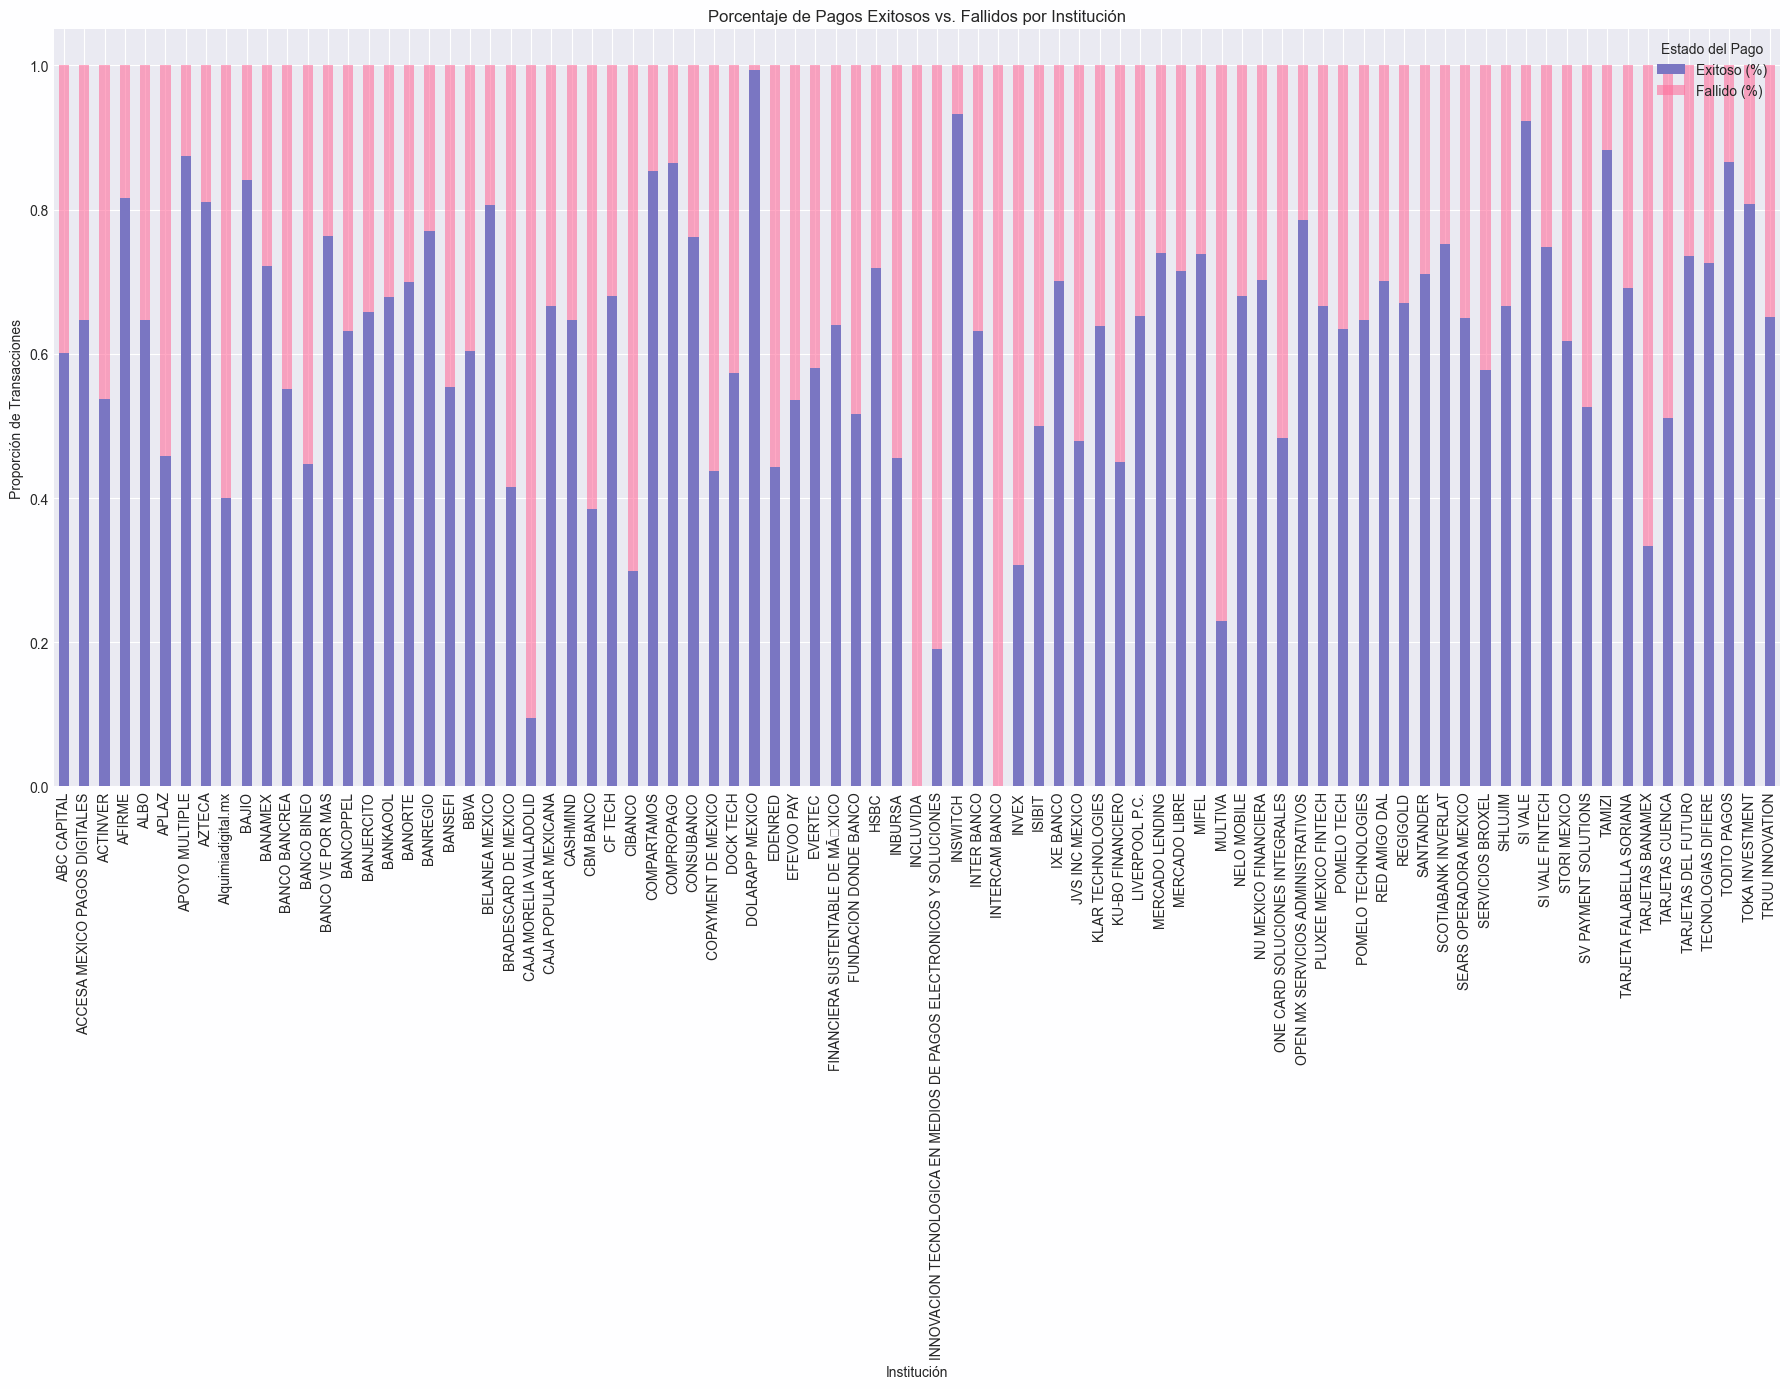

In [ ]:
bank_summary = df_merged.groupby(['institucion_bin', 'pago_exitoso']).size().unstack(fill_value=0)
# filtar por Fallido mayor a 0 y Exitoso mayor a 0
bank_summary_sorted = bank_summary[bank_summary['Fallido'] > 0]
#bank_summary_sorted = bank_summary[(bank_summary['Fallido'] > 0) & (bank_summary['Exitoso'] > 0)]

bank_summary_sorted['Total'] = bank_summary_sorted['Exitoso'] + bank_summary_sorted['Fallido']

# 3. Calcular los porcentajes
bank_summary_sorted['Exitoso (%)'] = bank_summary_sorted['Exitoso'] / bank_summary_sorted['Total']
bank_summary_sorted['Fallido (%)'] = bank_summary_sorted['Fallido'] / bank_summary_sorted['Total']

# 4. Crear un DataFrame solo con los porcentajes para graficar
percentage_summary = bank_summary_sorted[['Exitoso (%)', 'Fallido (%)']]

# 5. Generar el Gráfico 100% Apiladas
percentage_summary.plot(
    kind='bar', 
    stacked=True, 
    figsize=(18, 14)
)

plt.title('Porcentaje de Pagos Exitosos vs. Fallidos por Institución')
plt.xlabel('Institución')
# El eje Y ahora representa la Proporción (0.0 a 1.0)
plt.ylabel('Proporción de Transacciones') 
plt.legend(title='Estado del Pago')

# Opcional: Rotar etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# agregar columna Total a bank_summary
bank_summary['Total'] = bank_summary.sum(axis=1)

# Agregar columnas de porcentaje exitoso y fallido
bank_summary['Exitoso (%)'] = bank_summary['Exitoso'] / bank_summary['Total']
bank_summary['Fallido (%)'] = bank_summary['Fallido'] / bank_summary['Total']

bank_summary.head()

pago_exitoso,Exitoso,Fallido,Total,Exitoso (%),Fallido (%)
institucion_bin,,,,,
ABC CAPITAL,8358,5538,27792,0.300734,0.199266
ACCESA MEXICO PAGOS DIGITALES,244,133,754,0.323607,0.176393
ACTINVER,166,143,618,0.268608,0.231392
AFIRME,24032,5395,58854,0.408332,0.091668
ALBO,1428,779,4414,0.323516,0.176484


In [ ]:
# calcular tasa de rechazo
bank_summary['Tasa de Rechazo (%)'] = bank_summary['Fallido'] / bank_summary['Total'] * 100
bank_summary.head()

pago_exitoso,Exitoso,Fallido,Total,Exitoso (%),Fallido (%),Tasa de Rechazo (%)
institucion_bin,,,,,,
ABC CAPITAL,8358,5538,27792,0.300734,0.199266,19.926598
ACCESA MEXICO PAGOS DIGITALES,244,133,754,0.323607,0.176393,17.639257
ACTINVER,166,143,618,0.268608,0.231392,23.139159
AFIRME,24032,5395,58854,0.408332,0.091668,9.166752
ALBO,1428,779,4414,0.323516,0.176484,17.648391


In [ ]:
# filtrar por total mayor a 1000
bank_summary_filtered = bank_summary[bank_summary['Total'] > 1000]
bank_summary_filtered.head()

pago_exitoso,Exitoso,Fallido,Total,Exitoso (%),Fallido (%),Tasa de Rechazo (%)
institucion_bin,,,,,,
ABC CAPITAL,8358,5538,27792,0.300734,0.199266,19.926598
AFIRME,24032,5395,58854,0.408332,0.091668,9.166752
ALBO,1428,779,4414,0.323516,0.176484,17.648391
AZTECA,27290,6396,67372,0.405064,0.094936,9.493558
BAJIO,4242,805,10094,0.420250,0.079750,7.975035


In [ ]:
bank_summary_filtered.to_csv('../data/bank_summary_filtered.csv')

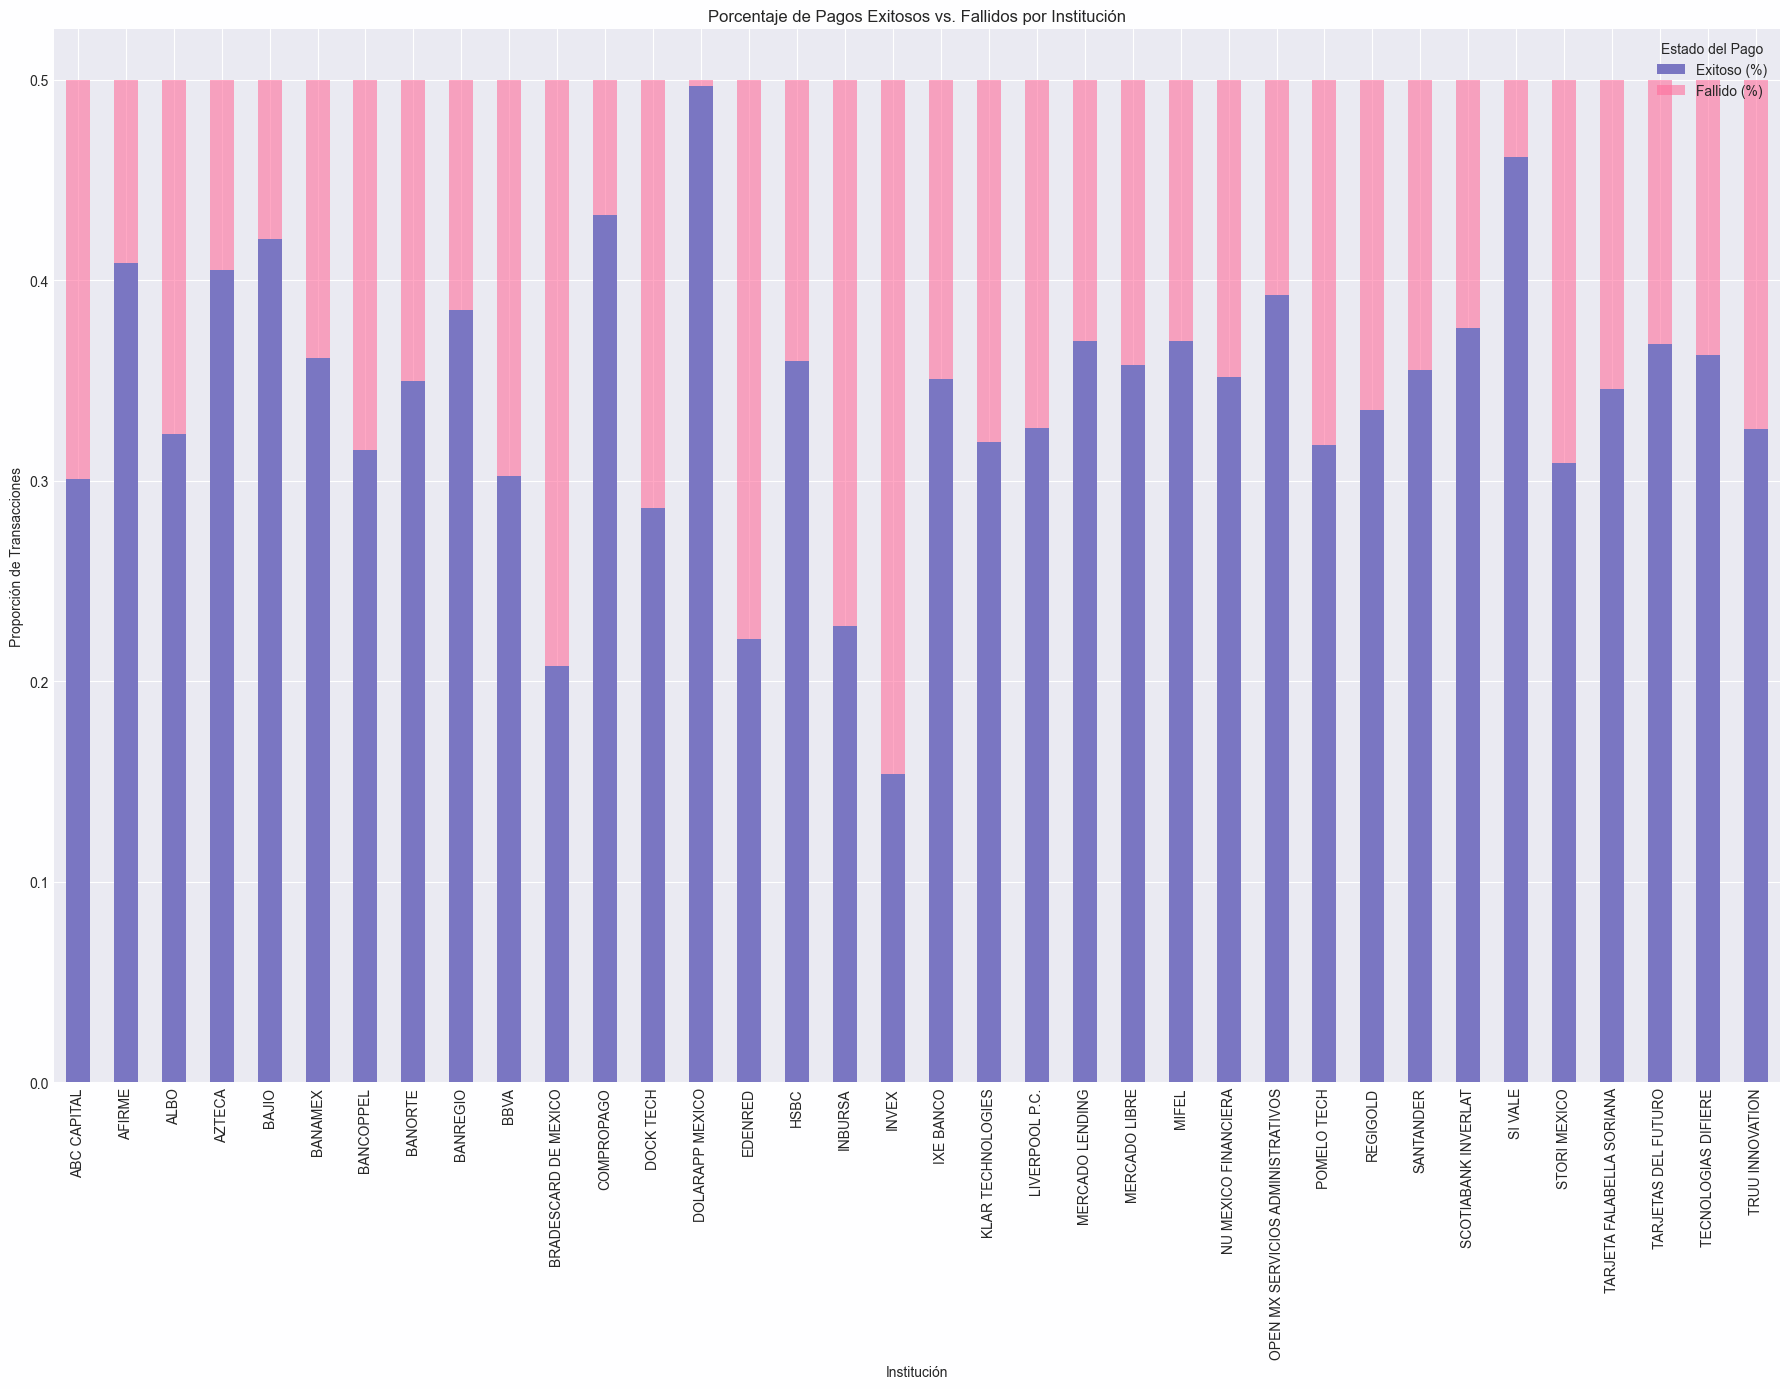

In [ ]:
percentage_chart = bank_summary_filtered[['Exitoso (%)', 'Fallido (%)']]

# 5. Generar el Gráfico 100% Apiladas
percentage_chart.plot(
    kind='bar', 
    stacked=True, 
    figsize=(18, 14)
)

plt.title('Porcentaje de Pagos Exitosos vs. Fallidos por Institución')
plt.xlabel('Institución')
# El eje Y ahora representa la Proporción (0.0 a 1.0)
plt.ylabel('Proporción de Transacciones') 
plt.legend(title='Estado del Pago')

# Opcional: Rotar etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

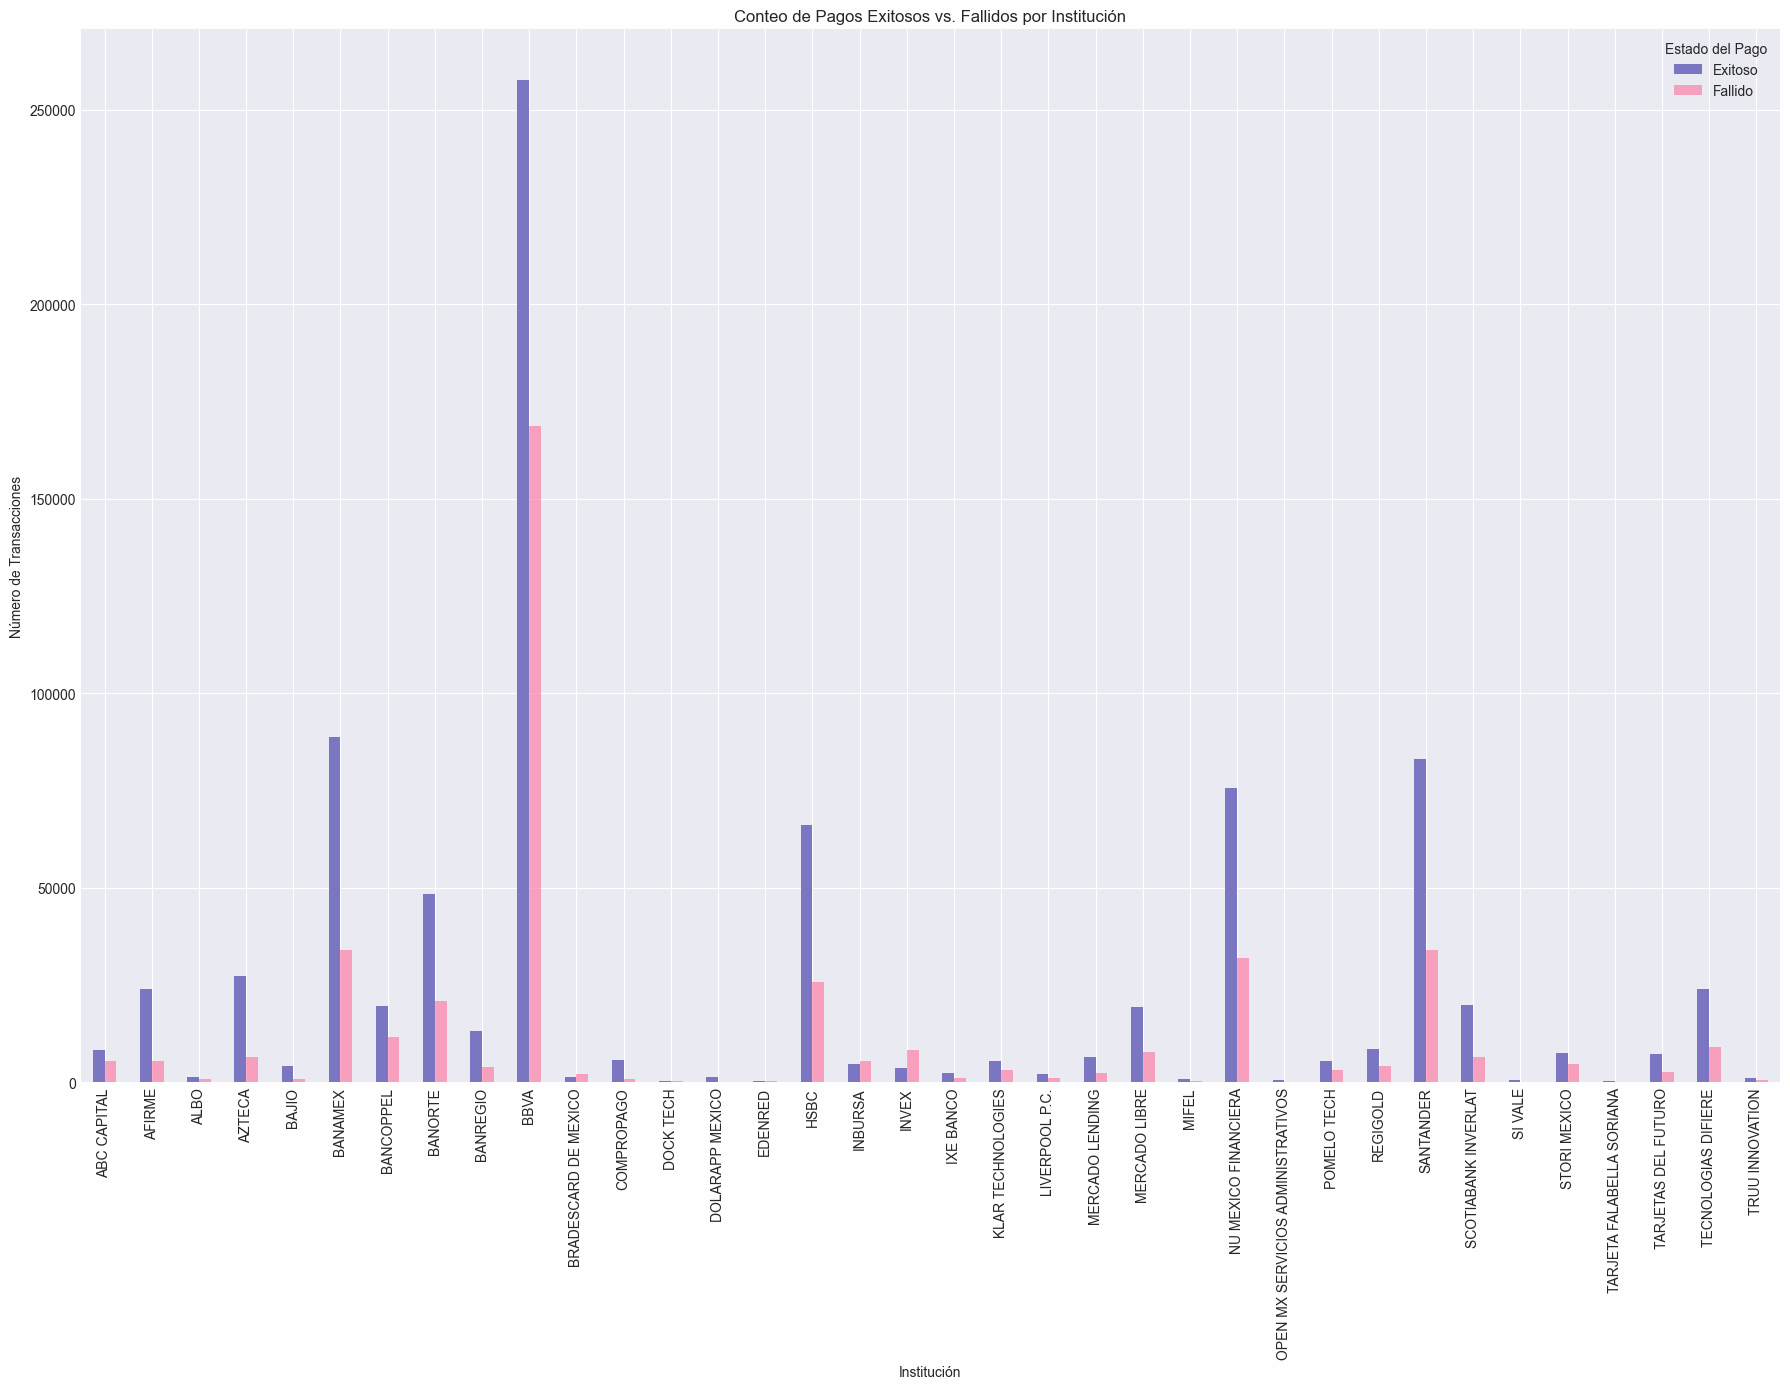

In [ ]:
percentage_chart_count = bank_summary_filtered[['Exitoso', 'Fallido']]

# grafico de barras comparativo de exitoso y fallido
percentage_chart_count.plot(
    kind='bar', 
    stacked=False, 
    figsize=(18, 14)
)
plt.title('Conteo de Pagos Exitosos vs. Fallidos por Institución')
plt.xlabel('Institución')
plt.ylabel('Número de Transacciones') 
plt.legend(title='Estado del Pago')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()